## 911 Calls Exploring Data and Analaysis
For this Exploring Data Analysis project, we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Exploring Data Analysis report contents:

* Data Overview
* Data Cleaning and Feature Engineering: Categorical Data
* Data Clearning and Feature Engineering: Numerica Data
* Hypothesis Testing (3 of them)
* Conducting a formal significance test for one of the hypotheses and discuss the results
* Suggestions for next steps in analyzing this data
* Summary of the quality of this data set and a request for additional data if needed


## Exploring Data Analysis Initial Plans:
* Read data as dataset
* present the summary of characteristics of dataset and find out the data types of each features of our dataset.
* Check Nan values, null values, outlier and perform data cleaning
* EDA -> Check make statistical analysis like determining mean, median, correlation, standard deviation and do visualization while identifying features to use to predict. 
* Feature engineering and Hypothesis analysis

###### EMS: Emergency Medical Services



In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data as dataset

reading data and view what kind of data it is and look for each columns and rows we have.

In [2]:
dataset = pd.read_csv('data/911.csv')

In [3]:
#### Information on dataset we have
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


##### We need to check characteristics of our dataset and find the summary of each features data types we have

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
dataset.isnull().sum().sort_values()

lat              0
lng              0
desc             0
title            0
timeStamp        0
e                0
twp             43
addr           519
zip          12855
dtype: int64

Through dataset, our data shows that we have the following characteristics:
 * Number of rows (entries): 99492
 * Number of columns: 9
 * Dataset features contains different data types like (floats, objects)
 * Dataset features shows missing data:
     * there are 12855 missing data from zip(zip code) column
     * there are 43 missing data from twp(township) column
     * there are 519 missing data addr(address) column
 * Most of our data is type of Object(String).
 
 
 ###### 1. We need to find out most consecutive emergency that most frequently use 911 call. 
 ###### 2. find out the place where there are many emergency  between 2015-2016.
 ###### 3. We will use hypothesis testing to find out time of day that has effect on volume of 911 calls.
 
 ###### The results of above steps will help us to find which models that can be used to track down the uses of volume of 911 calls and days of most emergency.
     

In [6]:
dataset['timeStamp'] = pd.to_datetime(dataset['timeStamp'])

In [7]:
dataset['Hour'] = dataset['timeStamp'].apply(lambda time : time.hour)
dataset['Month'] = dataset['timeStamp'].apply(lambda time : time.month)
dataset['Day of Week'] = dataset['timeStamp'].apply(lambda time : time.dayofweek)
# Day of week is an integer 0-6, I will change it into string name day of week
dmap = {0:'Mon', 1:'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['Day of Week'] = dataset['Day of Week'].map(dmap)


After adding other features of hour, month, and days of weeks of emergency calls, the results is the following 

In [8]:
dataset.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thu


## Data Cleaning and Feature Engineering

### 1. We will start with Data cleaning

we found that we have the following data that we need to be carefull working with them:

* there are 12855 missing data from zip(zip code) column
* there are 43 missing data from twp(township) column
* there are 519 missing data addr(address) column

Thus:
* we will replace missing values of zipcode into 0
* we will replace missing input data of township into noTown Provided
* we will replace missing values of address to it's township

In [9]:
## cleaning missing data of zipcode
dataset['zip'] = dataset['zip'].replace(np.nan, 0)
## clearning missing data of township
dataset['twp'] = dataset['twp'].replace(np.nan, 'noTown Provided')
## cleaning missing data of address
for i in range(len(dataset['addr'])):
    if dataset['addr'][i] == 'nan':
        dataset['addr'][i] == dataset['twp'][i]

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          99492 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99492 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Hour         99492 non-null  int64         
 10  Month        99492 non-null  int64         
 11  Day of Week  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 9.1+ MB


Now we can see that data cleaning have taken place.

 To proceed with our goal of finding out the reason of most consecutive emergencies that most frequently use 911 call. we need, here we are go.

In [11]:
dataset['Reason'] = dataset['title'].apply(lambda title: title.split(':')[0])

In [12]:
dataset.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thu,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thu,EMS


###### Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

###### 1. We need to see general statistical values of results from cleaning and feature engineering to describe our dataset

In [13]:
dataset.describe()

,lat,lng,zip,e,Hour,Month
count,99492.000000,99492.000000,99492.000000,99492.0,99492.000000,99492.000000
mean,40.159526,-75.317464,16752.030334,1.0,13.117085,4.983195
std,0.094446,0.174826,6460.927718,0.0,5.671564,3.012176
min,30.333596,-95.595595,0.000000,1.0,0.000000,1.000000
25%,40.100423,-75.392104,19006.000000,1.0,9.000000,3.000000
50%,40.145223,-75.304667,19131.000000,1.0,14.000000,5.000000
75%,40.229008,-75.212513,19440.000000,1.0,17.000000,7.000000
max,41.167156,-74.995041,77316.000000,1.0,23.000000,12.000000


The above results shows that there are no outliers in our data.
Then, and the table provide mean, standard deviation, min max, median, quartilies for better visualiation


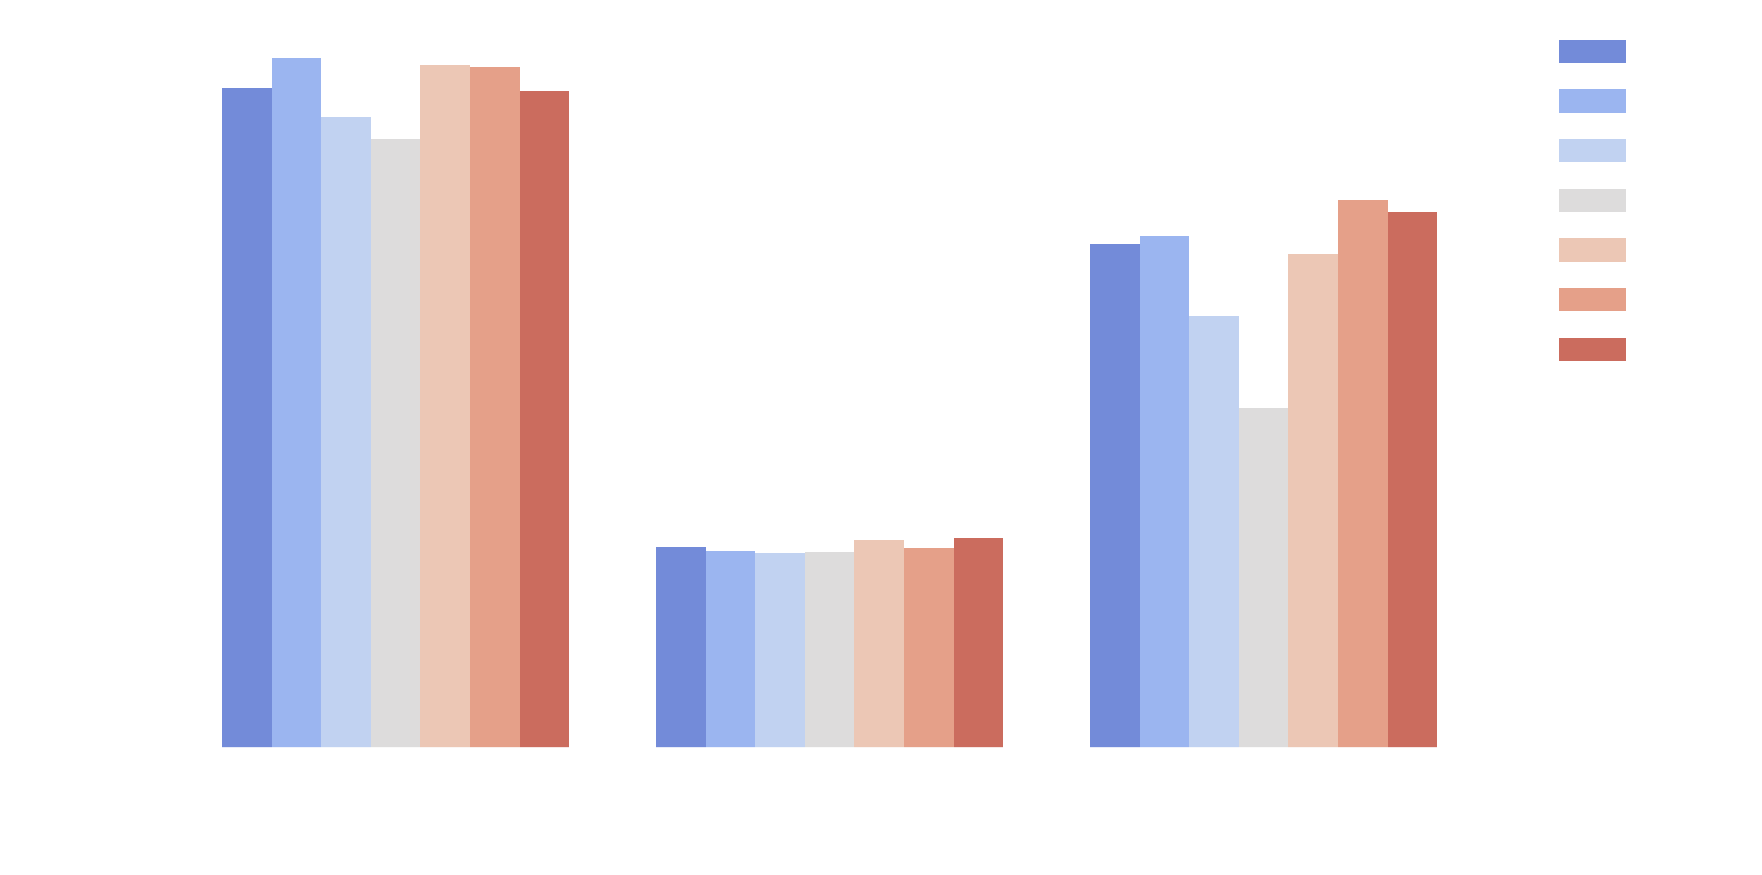

In [24]:
sns.countplot(x='Reason', data=dataset, hue='Day of Week', palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

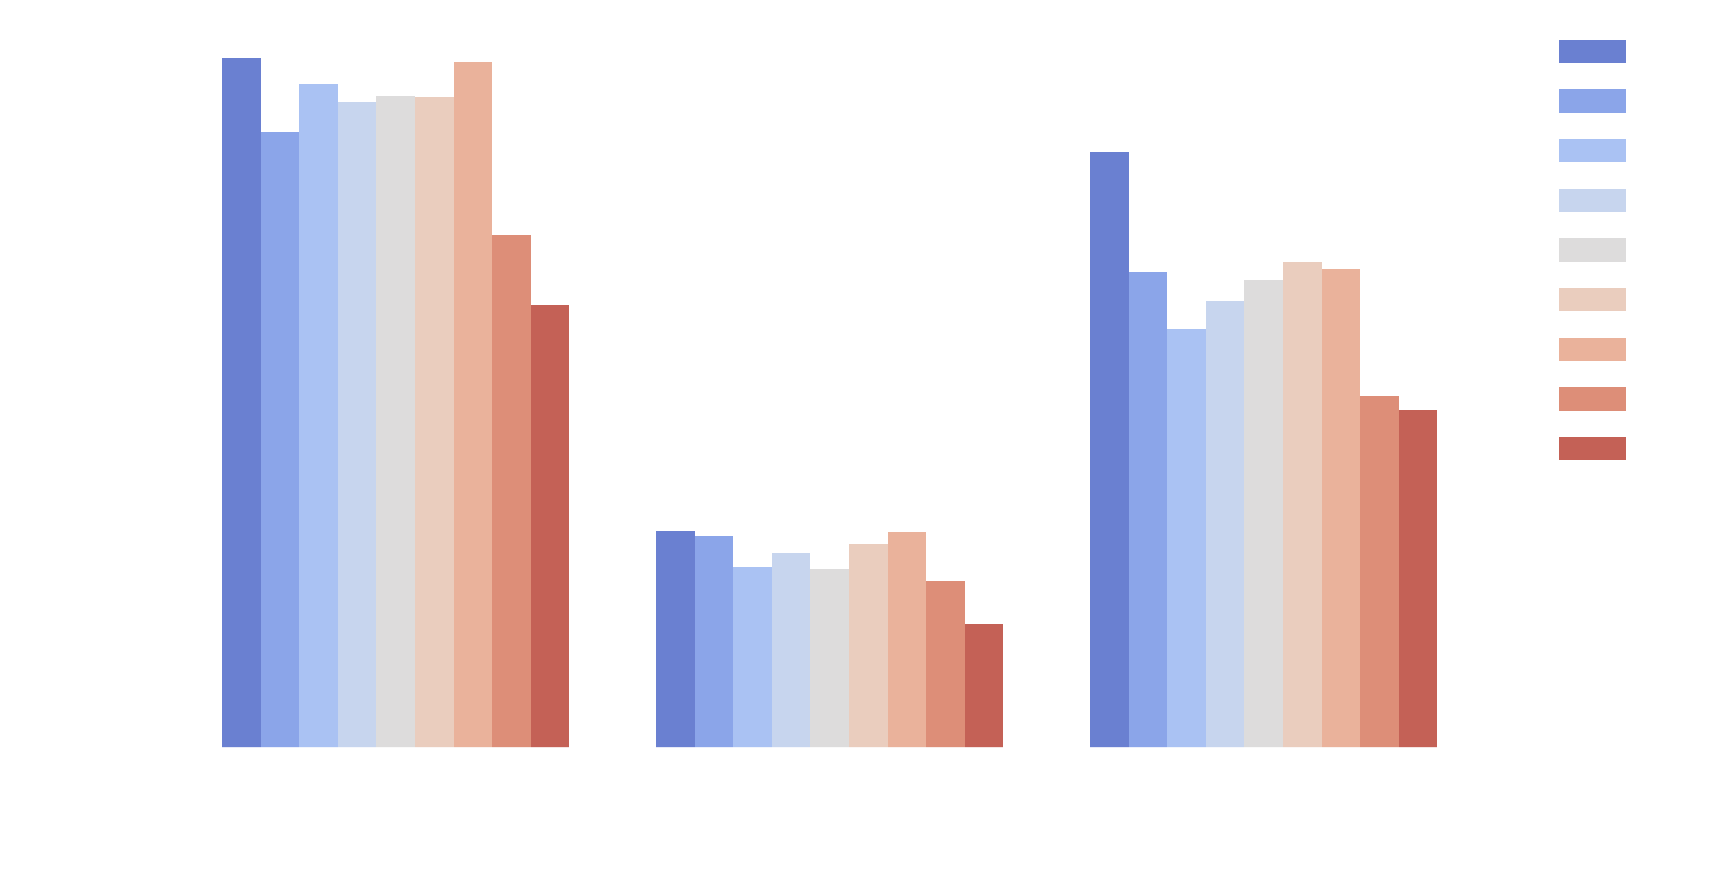

In [25]:
sns.countplot(x='Reason', data=dataset, hue='Month', palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

###### From the above charts of reasons of call due to Days of week and month, the visualisation shows that there is imbalaned data provided which might cause an issue while model classification

###### 3. Then, we can start to find mean, median, correlation, standard deviation for each group to see the possibilities of model selection.

In [15]:
dataset.groupby('Reason').mean()

,lat,lng,zip,e,Hour,Month
Reason,,,,,,
EMS,40.167055,-75.327201,17456.570207,1.0,12.771569,5.015406
Fire,40.155476,-75.319704,16766.697788,1.0,13.456166,4.970845
Traffic,40.150910,-75.303194,15781.176327,1.0,13.448466,4.944250


In [16]:
dataset.groupby('Reason').std()

,lat,lng,zip,e,Hour,Month
Reason,,,,,,
EMS,0.096620,0.180239,5605.714066,0.0,5.962304,2.987176
Fire,0.089404,0.185086,6426.186220,0.0,5.717137,2.971436
Traffic,0.092632,0.161416,7378.435335,0.0,5.196015,3.062346


* We can observe from the above results that emergency of Fire has much effect in volume of 911 calls as the hour it takes has greater mean and low standard deviation.
* EMS has least effect in volume of 911 calls as the hour it takes has low mean compared to other reasons.


###### we can observe that, we need to continue with applying transformation to our data to improve them for next step of model fit.

In [17]:
## function to check skewness
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
    # Define a limit above which we will log transform
    skew_vals = data.skew()
    
    # showing the skewed columns
    skew_cols = (skew_vals.sort_values(ascending=False).to_frame('Skew').query('abs(Skew) > {}'.format(skew_limit)))
    return skew_cols

In [18]:
skew_cols = skew_df(dataset, 0.075)
skew_cols

,Skew
Month,0.690686
Hour,-0.339847
zip,-2.192439
lat,-16.639012
lng,-21.550039


###### applying log transformation to skewed features from dataset

In [19]:
## perform log transformation
for col in skew_cols.index.values:
    dataset['log_' + col] = dataset[col].apply(np.log1p)

In [20]:
# Check skeweness on log transformed data
log_df = dataset.filter(regex='^log_', axis=1)
skew_log_cols = skew_df(log_df, 0.75)
skew_log_cols

,Skew
log_Hour,-2.080357
log_zip,-2.210814
log_lat,-22.580780


In [21]:
d = {
    'log_Month': 'Month',
    'log_Hour': 'Hour',
    'log_zip': 'zip',
    'log_lat': 'lat',
    'log_lng': 'lng'
}

numeric_df = dataset.select_dtypes(include=np.number)
numeric_df.describe()

,lat,lng,zip,e,Hour,Month,log_Month,log_Hour,log_zip,log_lat,log_lng
count,99492.000000,99492.000000,99492.000000,99492.0,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,0.0
mean,40.159526,-75.317464,16752.030334,1.0,13.117085,4.983195,1.652344,2.514484,8.589987,3.717453,NaN
std,0.094446,0.174826,6460.927718,0.0,5.671564,3.012176,0.542269,0.616399,3.308896,0.002349,NaN
min,30.333596,-95.595595,0.000000,1.0,0.000000,1.000000,0.693147,0.000000,0.000000,3.444691,NaN
25%,40.100423,-75.392104,19006.000000,1.0,9.000000,3.000000,1.386294,2.302585,9.852563,3.716018,NaN
50%,40.145223,-75.304667,19131.000000,1.0,14.000000,5.000000,1.791759,2.708050,9.859118,3.717108,NaN
75%,40.229008,-75.212513,19440.000000,1.0,17.000000,7.000000,2.079442,2.890372,9.875140,3.719142,NaN
max,41.167156,-74.995041,77316.000000,1.0,23.000000,12.000000,2.564949,3.178054,11.255669,3.741642,NaN


In [22]:
# Create a functions to plot multiple bar charts
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

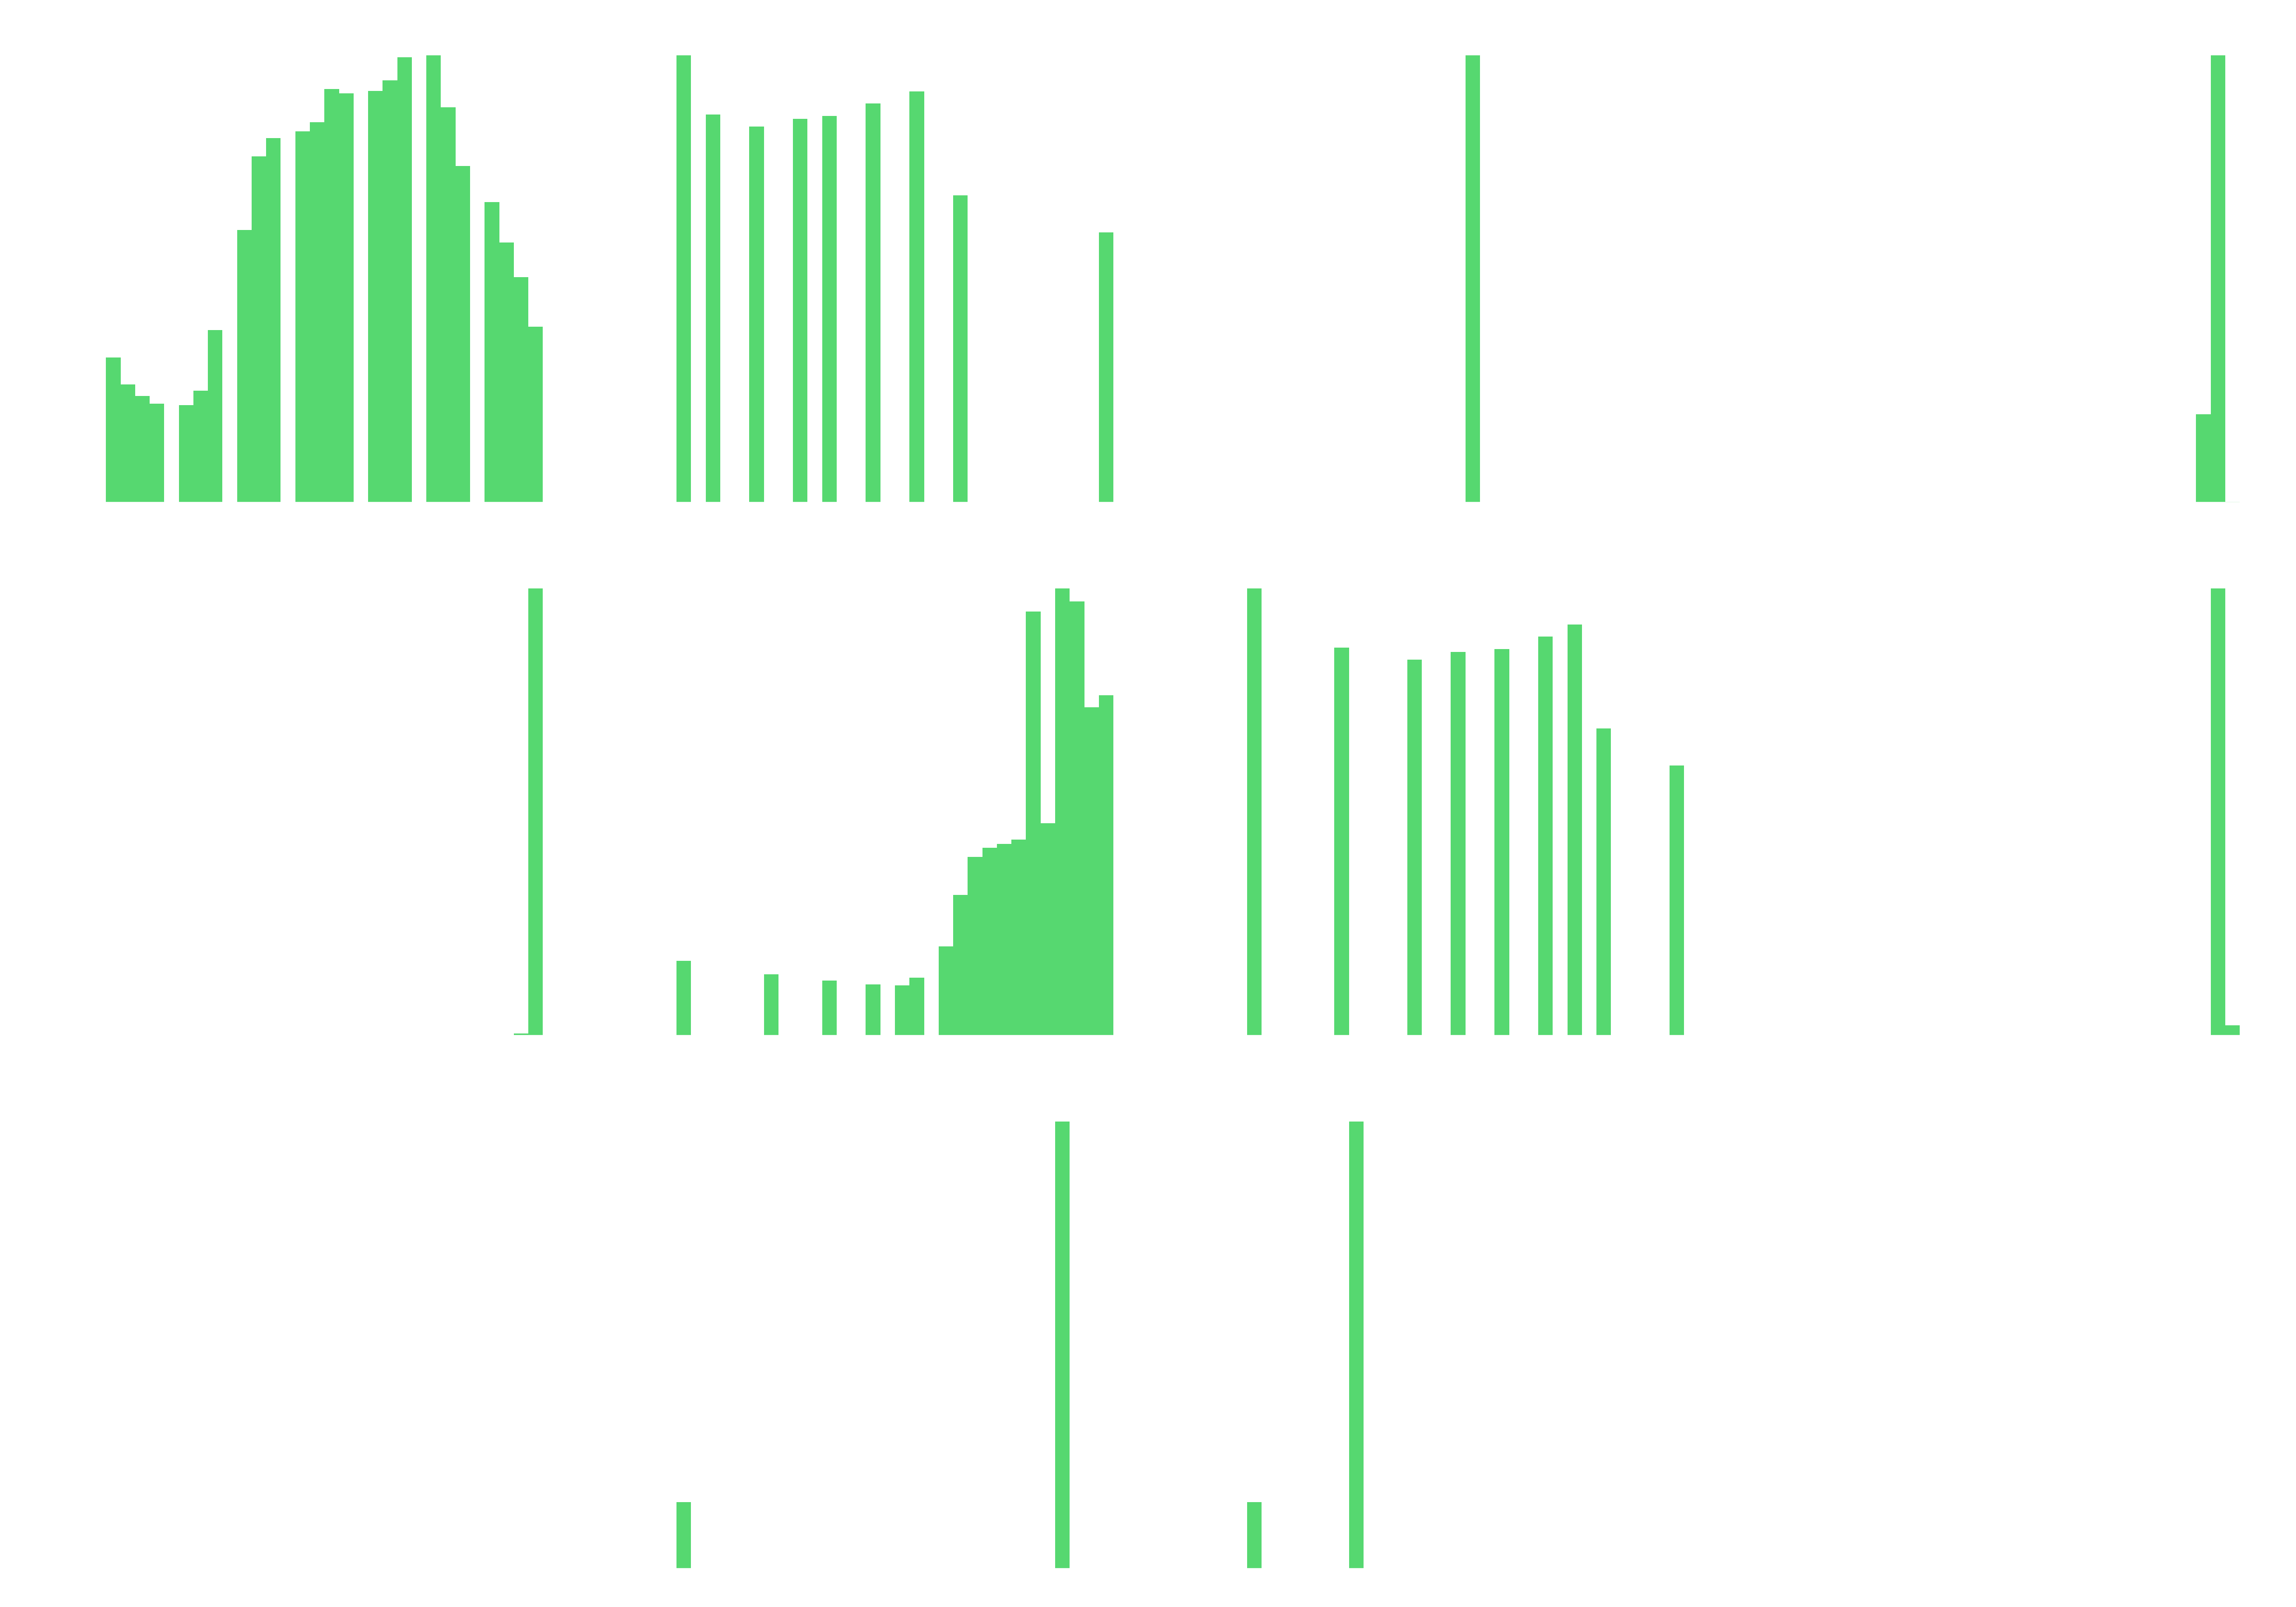

In [23]:
hist_loop(data=numeric_df,
          rows=3,
          cols=4,
          figsize=(20,14))

## Hypothesis Testing of our dataset

 ###### We will use hypothesis testing to find out time of day that has effect on volume of 911 calls.

<AxesSubplot:xlabel='Day of Week', ylabel='Count'>

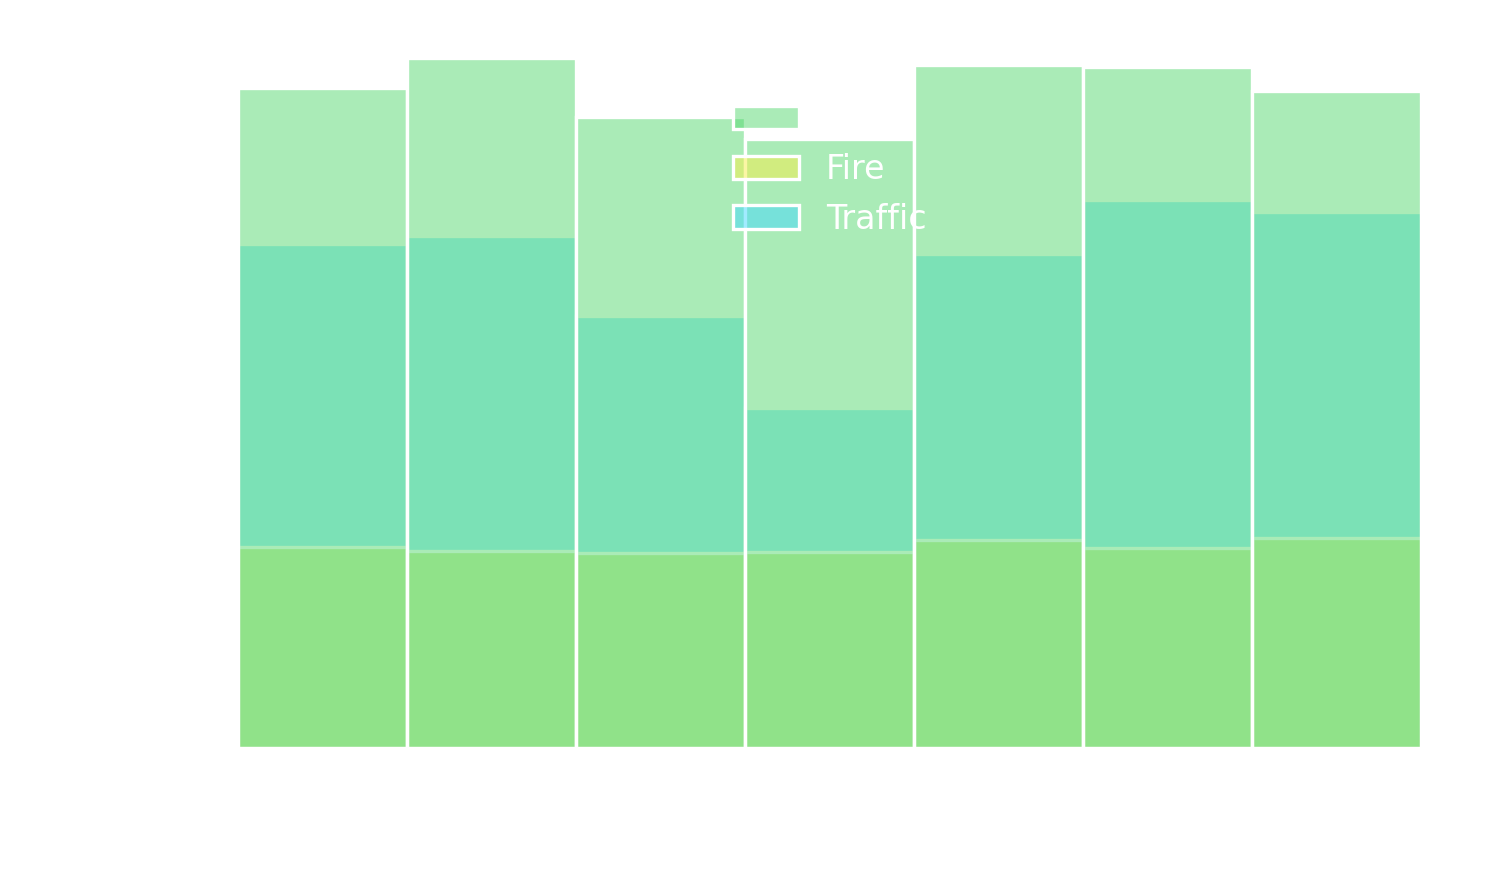

In [36]:
sns.histplot(data=dataset, x='Day of Week', hue='Reason')
# plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)

<AxesSubplot:xlabel='Day of Week', ylabel='Count'>

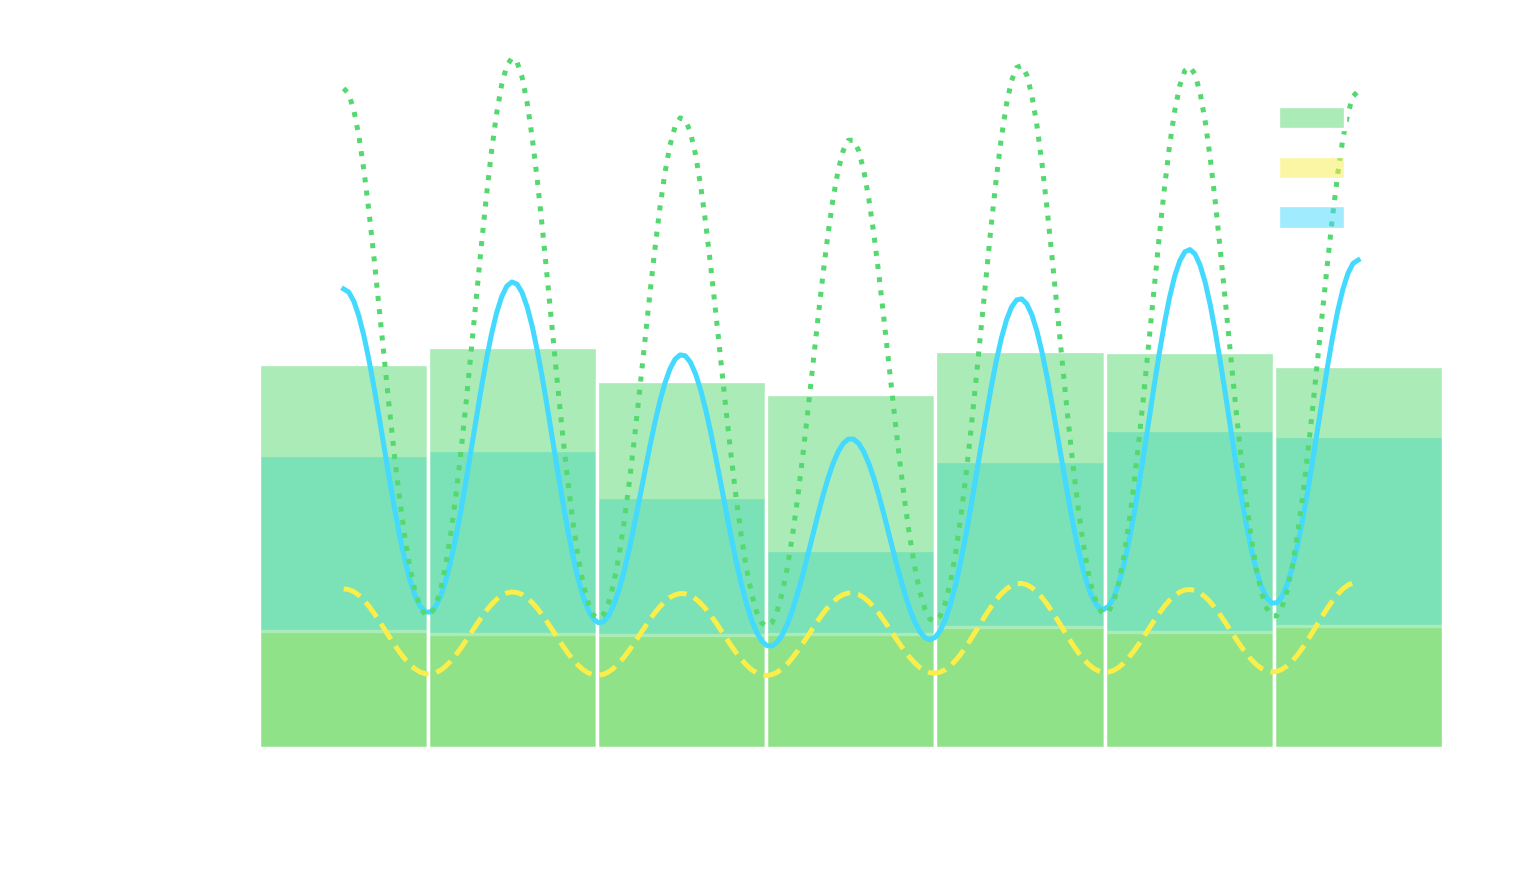

In [72]:
sns.histplot(data=dataset, x='Day of Week', kde=True, hue='Reason')

In [47]:
dataset['Date'] = dataset['timeStamp'].apply(lambda t: t.date())

###### From the above histogram, we can formulate our hypothesis in this way:
1. time of day has some effect on volume of 911 calls
2. month has some effect on volume of 911 calls
3. EMS has great effect on volume of 911 calls

###### 1. Time of day has some effect on volume of 911 calls
* our null hypothesis will be "time of day has no effect on volume of 911 calls"
* our alternative hypothesis will be "time of day has some effect on volume of 911 calls"

We need to find p-value.
 as p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results.

In [174]:
mon_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[0]
tue_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[1]
wed_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[2]
thu_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[3]
fri_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[4]
sat_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[5]
sun_mean = dataset.groupby('Day of Week').mean()['Hour'].iloc[6]

days_mean = [mon_mean, tue_mean, wed_mean, thu_mean, fri_mean, sat_mean, sun_mean]

mon_std = dataset.groupby('Day of Week').std()['Hour'].iloc[0]
tue_std = dataset.groupby('Day of Week').std()['Hour'].iloc[1]
wed_std = dataset.groupby('Day of Week').std()['Hour'].iloc[2]
thu_std = dataset.groupby('Day of Week').std()['Hour'].iloc[3]
fri_std = dataset.groupby('Day of Week').std()['Hour'].iloc[4]
sat_std = dataset.groupby('Day of Week').std()['Hour'].iloc[5]
sun_std = dataset.groupby('Day of Week').std()['Hour'].iloc[6]

days_std = [mon_std, tue_std, wed_std, thu_std, fri_std, sat_std, sun_std]

In [190]:
from scipy.stats import norm
import scipy.stats as stats
days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
for i in range(len(days_mean)):
    print('The probability of getting massive call on {} is {}'.format(days[i],norm.cdf(70, days_mean[i], days_std[i])))
    print('The p-value for {} is: {}'.format(days[i],norm.ppf(0.05, days_mean[i], days_std[i])))



The probability of getting massive call on Monday is 1.0
The p-value for Monday is: 4.1630465706831465
The probability of getting massive call on Tuesday is 1.0
The p-value for Tuesday is: 3.911964866746967
The probability of getting massive call on Wednesday is 1.0
The p-value for Wednesday is: 3.3659707066538544
The probability of getting massive call on Thursday is 1.0
The p-value for Thursday is: 2.722665382792572
The probability of getting massive call on Friday is 1.0
The p-value for Friday is: 4.101235297308582
The probability of getting massive call on Saturday is 1.0
The p-value for Saturday is: 4.047523777904953
The probability of getting massive call on Sunday is 1.0
The p-value for Sunday is: 4.045005226649829


The above results shows that probability of getting massive 911 calls of emergency is 1 which is strange but somehow seems to be true. It means that our p-values is not explaining the observation fairly. but as the p-value is to low compared to signifance level, we reject our null hypothesis and we can conclude that most time of day has some effect on volume of 911 calls

In [180]:
dataset.groupby('Month').mean()['Hour']

Month
1     12.980159
2     13.110927
3     13.057472
4     12.936076
5     13.098310
6     13.252927
7     13.284996
8     12.961005
12    13.441210
Name: Hour, dtype: float64

###### 2. month has some effect on volume of 911 calls
from the above data observations, there are missing data of september, october, and november. for simply, we can conclude that those months has no effect on volume of 911 calls which doesn't make sense since there is problem of missing data.

###### 3. EMS has great effect on volume of 911 calls

In [184]:
ems_mean = dataset.groupby('Reason').mean()['Hour'].iloc[0]
fire_mean = dataset.groupby('Reason').mean()['Hour'].iloc[1]
traffic_mean = dataset.groupby('Reason').mean()['Hour'].iloc[2]

ems_std = dataset.groupby('Reason').std()['Hour'].iloc[0]
fire_std = dataset.groupby('Reason').std()['Hour'].iloc[1]
traffic_std = dataset.groupby('Reason').std()['Hour'].iloc[2]

reasons_mean = [ems_mean, fire_mean, traffic_mean]
reasons_std = [ems_std, fire_std, traffic_std]

In [193]:
reasons = {
    0: 'EMS',
    1: 'Fire',
    2: 'Traffic'
}
for i in range(len(reasons_mean)):
    print('The probability of getting massive call for {}  is {}'.format(reasons[i],norm.cdf(70, reasons_mean[i], reasons_std[i])))
    print('The p-value for {} is: {}'.format(reasons[i],norm.ppf(0.03, reasons_mean[i], reasons_std[i])))

The probability of getting massive call for EMS  is 1.0
The p-value for EMS is: 1.55770530280906
The probability of getting massive call for Fire  is 1.0
The p-value for Fire is: 2.7034110671855007
The probability of getting massive call for Traffic  is 1.0
The p-value for Traffic is: 3.67583473273708


The above results shows that probability of getting massive 911 calls for different reasons of emergency provided is 1 which is strange but somehow seems to be true. It means that our p-values is not explaining the observation fairly except for p-value for traffic which is slightly greater than our significance level. but as the p-value is to low compared to signifance level, we reject our null hypothesis for EMS and Fire, but we accept our null hypothesis for Traffic.

###### Next steps 

The following steps need to considered:
    
* Missing data of months needs to be taken care of as it tends to reduce the confidency of model selection.
* It is highly recommended to request addition information to this data as its quality is not quite good. increase of features of data will be great.
* Dealing with known reasons we have, and the outcome is categorial data. this means that classification method is quite useful.
* I will suggest k-nearest neighbours to be used as classification method.

###### Summary of quality of data.

* The quality of data provides featues that are quite useful but addition of other features are highly needed to make predictions and other analysis.

* We have seen that some provided data provided probability of 1, which is not quite true but its accurate is not bad. 
* The selection process of model to be used so that the prediction is quite useful with our 911 calls dataset requires more observations which doesn't have missing data as we have seen.